
**Objective and Focus:**

Our primary goal is to enhance marketing strategies among existing clients who are not currently making purchases, aiming to stimulate their interest in buying. This initiative emphasizes addressing false positives to effectively convert potential clients.

In contrast, if our aim were to encourage repeat purchases from existing buyers, our strategy would shift. We would focus on understanding:

- The demographic profile of non-purchasing clients.
- Identifying reasons behind their lack of purchases:
  - Are they satisfied with another brand?
  - Are financial constraints influencing their decision? Insights from their salary can provide clarity.
  - Are they occasional buyers who only purchase when there's a specific need?


In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df = pd.read_csv(r"C:\Users\Teni\Desktop\Git-Github\Datasets\Logistic Regression\car_data.csv")

In [319]:
df

User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]

In [320]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


**General Observation about the data**

- the data has 1000 rows
- the lowest age surveyed is 18 and the maximum ae is 63, the mean is 40
- the min salary is 15000, while the maximum salary is 152500
- the std of the age is low (10) meaning the majority of the data is centreed around the 30 (mean - std)30 & 50 (mean + the std). Approximately 68% of the data will fall within the range of 30-50

### Data Cleaning

In [321]:
# take the User ID, since we have our unique IDs

df.drop('User ID', axis=1, inplace=True)
df

Gender  Age  AnnualSalary  Purchased
0      Male   35         20000          0
1      Male   40         43500          0
2      Male   49         74000          0
3      Male   40        107500          1
4      Male   25         79000          0
..      ...  ...           ...        ...
995    Male   38         59000          0
996  Female   47         23500          0
997  Female   28        138500          1
998  Female   48        134000          1
999  Female   44         73500          0

[1000 rows x 4 columns]

In [322]:
# convert gender to a dummy variable

df = pd.get_dummies(df, columns=['Gender'])
df

Age  AnnualSalary  Purchased  Gender_Female  Gender_Male
0     35         20000          0              0            1
1     40         43500          0              0            1
2     49         74000          0              0            1
3     40        107500          1              0            1
4     25         79000          0              0            1
..   ...           ...        ...            ...          ...
995   38         59000          0              0            1
996   47         23500          0              1            0
997   28        138500          1              1            0
998   48        134000          1              1            0
999   44         73500          0              1            0

[1000 rows x 5 columns]

In [323]:
df = df.drop('Gender_Male', axis=1)
df

Age  AnnualSalary  Purchased  Gender_Female
0     35         20000          0              0
1     40         43500          0              0
2     49         74000          0              0
3     40        107500          1              0
4     25         79000          0              0
..   ...           ...        ...            ...
995   38         59000          0              0
996   47         23500          0              1
997   28        138500          1              1
998   48        134000          1              1
999   44         73500          0              1

[1000 rows x 4 columns]

In [324]:
df = df.rename(columns={'Gender_Female':'female_gender'})
df

Age  AnnualSalary  Purchased  female_gender
0     35         20000          0              0
1     40         43500          0              0
2     49         74000          0              0
3     40        107500          1              0
4     25         79000          0              0
..   ...           ...        ...            ...
995   38         59000          0              0
996   47         23500          0              1
997   28        138500          1              1
998   48        134000          1              1
999   44         73500          0              1

[1000 rows x 4 columns]

In [325]:
df.describe()

Age   AnnualSalary    Purchased  female_gender
count  1000.000000    1000.000000  1000.000000    1000.000000
mean     40.106000   72689.000000     0.402000       0.516000
std      10.707073   34488.341867     0.490547       0.499994
min      18.000000   15000.000000     0.000000       0.000000
25%      32.000000   46375.000000     0.000000       0.000000
50%      40.000000   72000.000000     0.000000       1.000000
75%      48.000000   90000.000000     1.000000       1.000000
max      63.000000  152500.000000     1.000000       1.000000

In [326]:
# checking for null data.

df.isnull().sum()

Age              0
AnnualSalary     0
Purchased        0
female_gender    0
dtype: int64

### Exploratory Data Analysis (EDA)

age and purchaese, gender-f, 

In [327]:
# checjk if the data is ballanced
df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

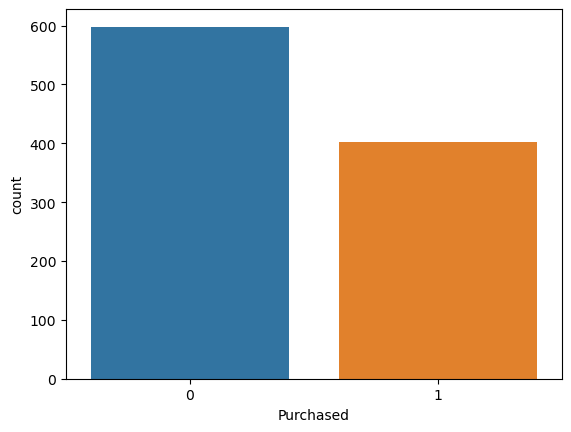

In [328]:
sns.countplot(data=df, x='Purchased')

plt.show()

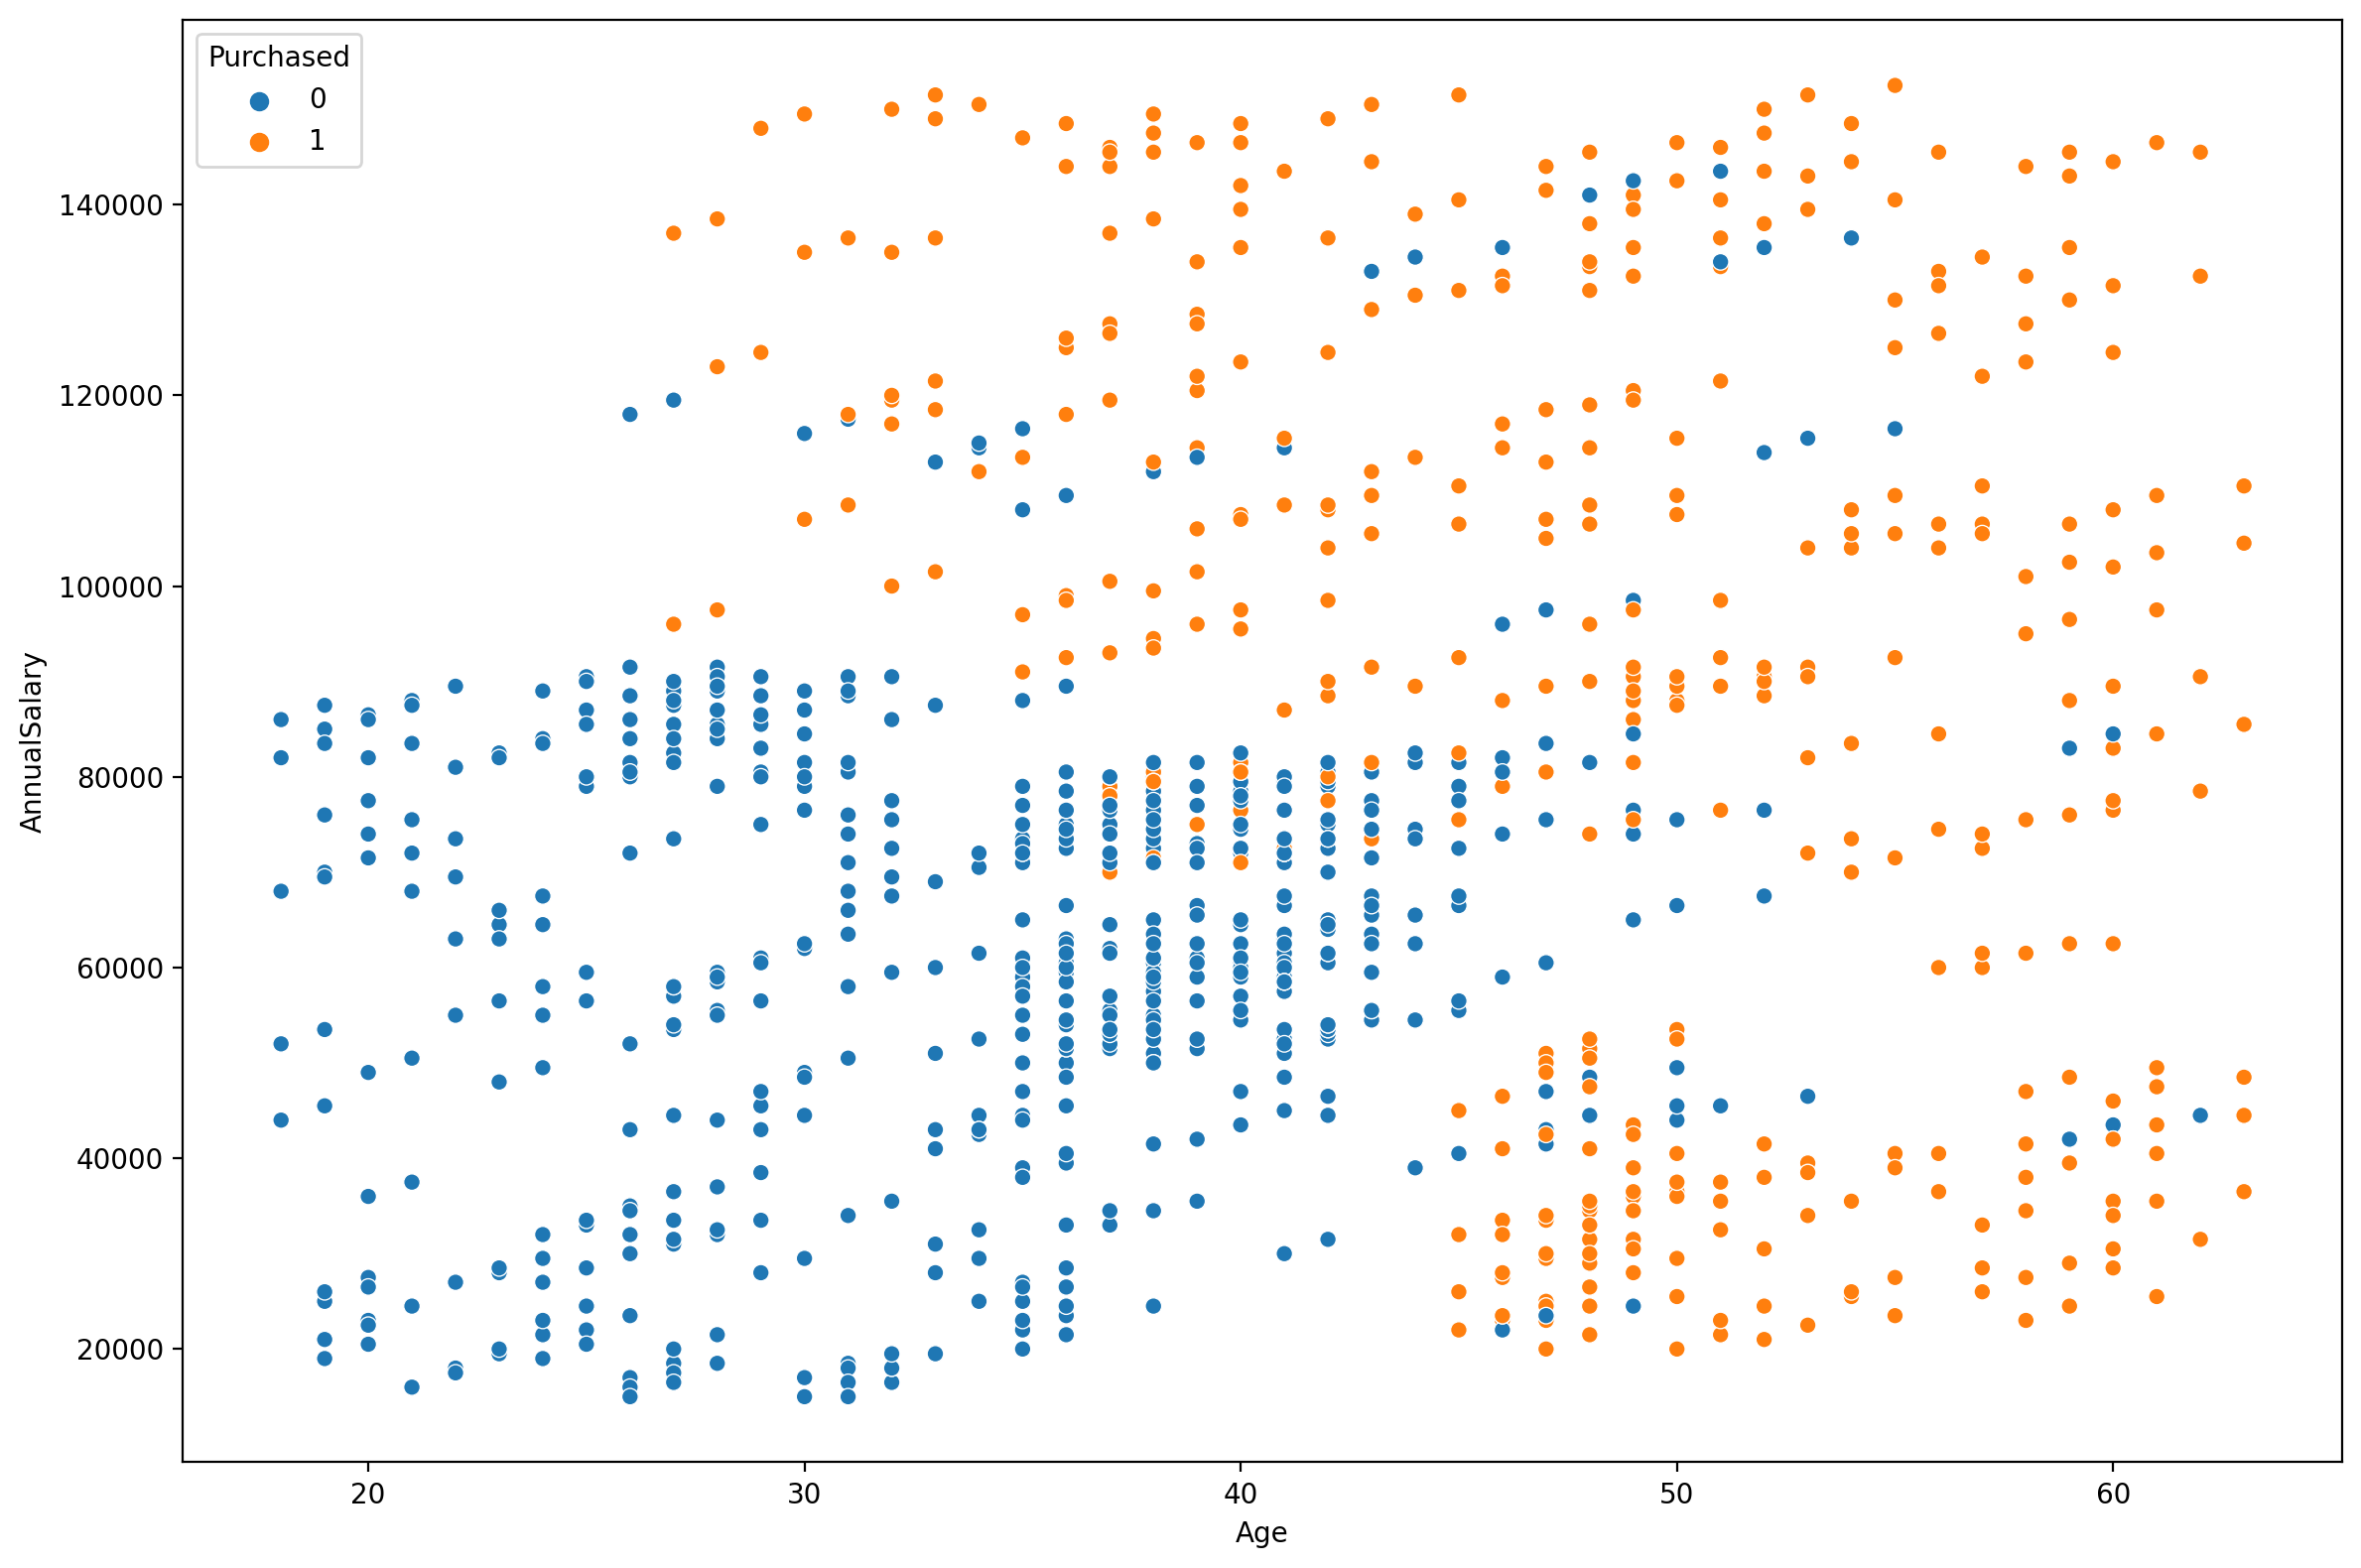

In [329]:
plt.figure(figsize=(12, 8), dpi=200)

sns.scatterplot(data=df, x='Age', y='AnnualSalary', hue='Purchased')

plt.tight_layout()
plt.show()

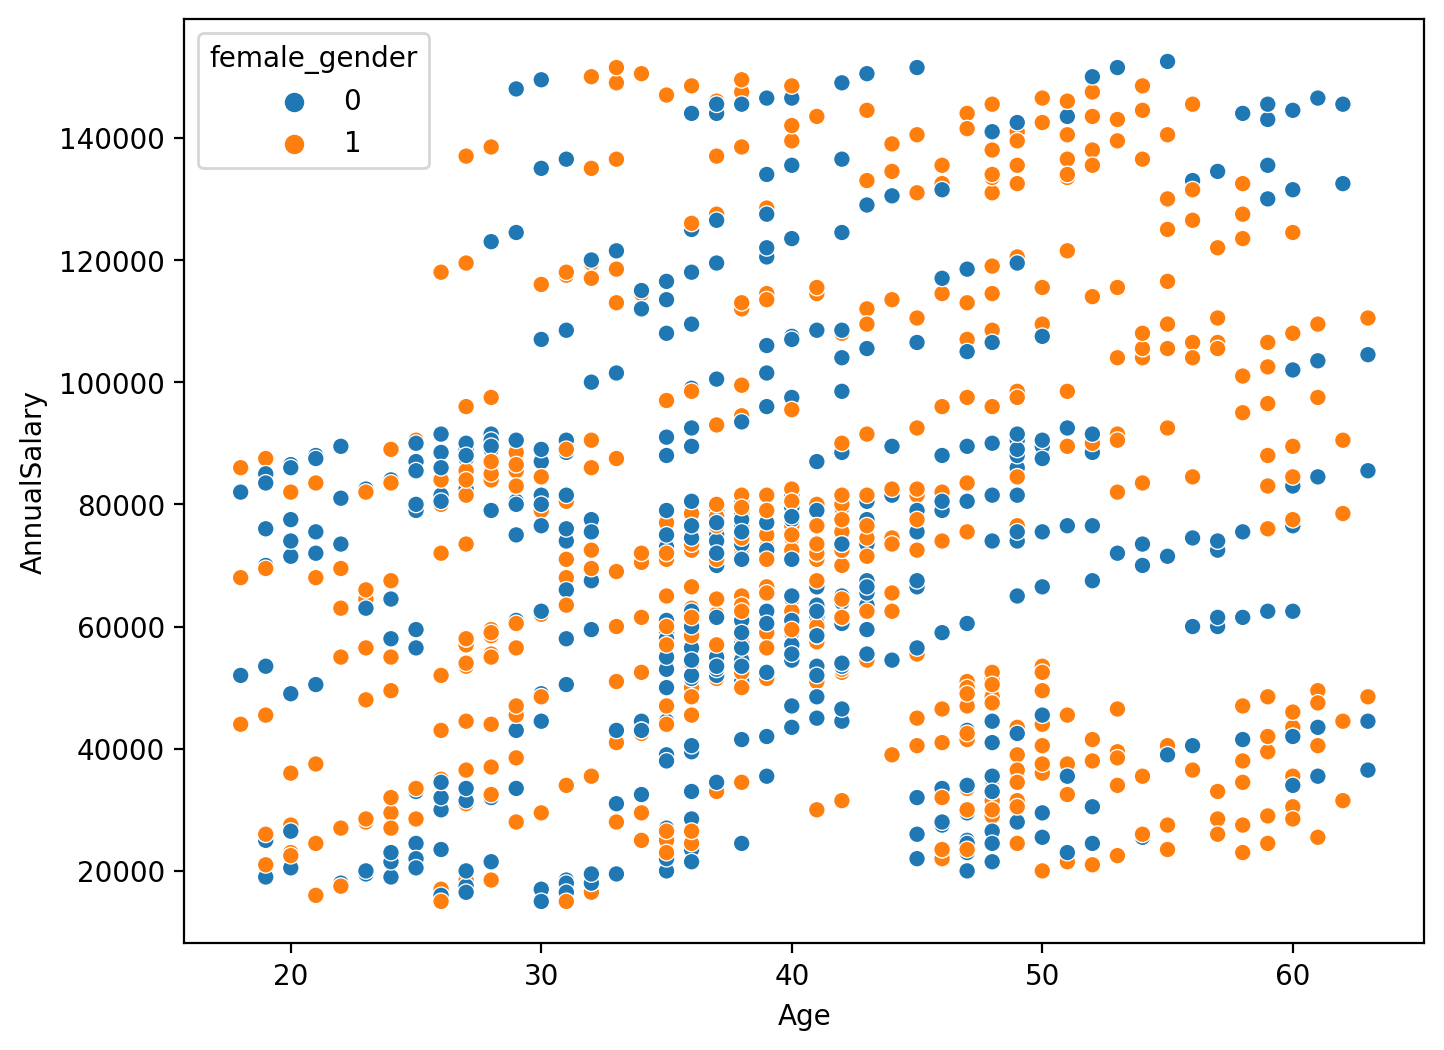

In [330]:
plt.figure(figsize=(8,6), dpi=200)

sns.scatterplot(data=df, x='Age', y='AnnualSalary', hue='female_gender')

# plt.tight_layout()
plt.show()

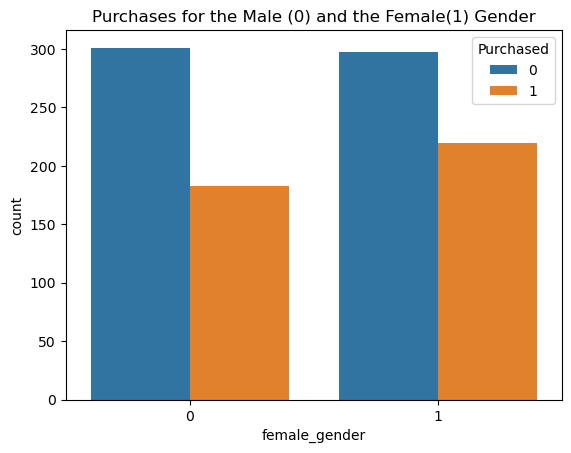

In [331]:
sns.countplot(x='female_gender',data=df, hue='Purchased')

plt.title('Purchases for the Male (0) and the Female(1) Gender')
plt.legend(title='Purchased', loc='upper right')

plt.show()


**Notes from the above:**
- Female participants in this survey purchased more cars than their male counterparts.
- The older generation showed a higher car purchase rate, indicating changing priorities, even if their income wasn't significantly higher.
- It's likely that the younger demographic has other priorities such as travel, education, personal development, exams, or starting a family.


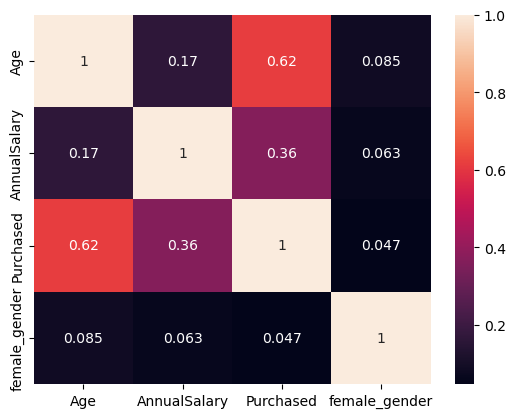

In [332]:
sns.heatmap(df.corr(), annot=True)

plt.show()

**Notes from the analysis**

- annual salary has the greatest correlation with if a car is purchased or not
- as the age progresses, annula salary decrease


### Define the X and Y

In [333]:
X = df.drop('Purchased', axis=1)
y = df.Purchased

### Train Test Split

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scale the data

In [336]:
from sklearn.preprocessing import StandardScaler

In [337]:
scaler = StandardScaler()

In [338]:
scaled_x_train = scaler.fit_transform(X_train)

In [339]:
scaled_x_test = scaler.transform(X_test)

### Create the model and predict

In [340]:
from sklearn.linear_model import LogisticRegression

In [341]:
model = LogisticRegression()

#### Predict

In [342]:
model.fit(scaled_x_train, y_train)

LogisticRegression()

In [343]:
y_pred= model.predict(scaled_x_test)

y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], d

In [344]:
model.predict_proba(scaled_x_test)

array([[0.99868814, 0.00131186],
       [0.4578815 , 0.5421185 ],
       [0.21962047, 0.78037953],
       [0.67531156, 0.32468844],
       [0.41424985, 0.58575015],
       [0.58345303, 0.41654697],
       [0.88087378, 0.11912622],
       [0.91304898, 0.08695102],
       [0.0363067 , 0.9636933 ],
       [0.68232584, 0.31767416],
       [0.70901873, 0.29098127],
       [0.99010544, 0.00989456],
       [0.30142507, 0.69857493],
       [0.41049669, 0.58950331],
       [0.10548753, 0.89451247],
       [0.99798686, 0.00201314],
       [0.62449971, 0.37550029],
       [0.04277203, 0.95722797],
       [0.86710804, 0.13289196],
       [0.94882396, 0.05117604],
       [0.85168651, 0.14831349],
       [0.93124916, 0.06875084],
       [0.45823822, 0.54176178],
       [0.94570206, 0.05429794],
       [0.92132013, 0.07867987],
       [0.58310375, 0.41689625],
       [0.21186749, 0.78813251],
       [0.62189261, 0.37810739],
       [0.96706985, 0.03293015],
       [0.97900077, 0.02099923],
       [0.

### Model Evaluation

In [345]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [346]:
accuracy_score(y_pred, y_test)

# the truly predicted values of the model make up 84% of the matrix

0.8366666666666667

In [347]:
confusion_matrix(y_test, y_pred)


array([[167,  19],
       [ 30,  84]], dtype=int64)

C:\Users\Teni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


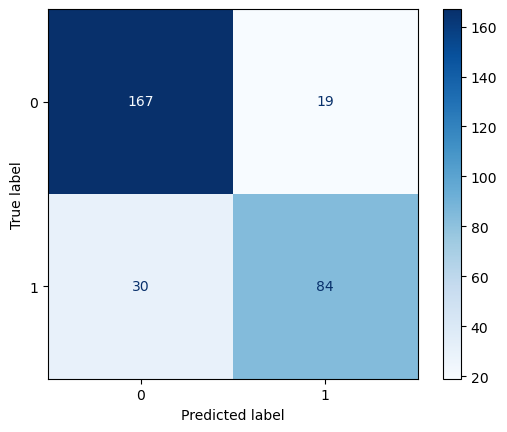

In [348]:
plot_confusion_matrix(model, scaled_x_test, y_test, cmap=plt.cm.Blues)


**Notes**:

- 167 and 84 are the true values for negatives and positives, respectively.
- 30 is the False Negative, while 19 is the False Positive.
- Since the objective of our prediction is to improve marketing strategies for existing clients who don’t purchase, the focus will be on minimizing both false positives and false negatives. This ensures we accurately identify potential clients to convert.
- If the focus was on stimulating those who already buy to keep buying, our approach would differ.
- To avoid missing out on important clients or data points, we'll hyper-tune our model to minimize and ensure the reliability of both false positives and false negatives.
- Therefore, the focus will be on Recall Metrics because the cost of missing a False Positive is high.


In [301]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       186
           1       0.82      0.74      0.77       114

    accuracy                           0.84       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.84      0.84      0.83       300



- Need to focus on minimizing the False Positives so that we don't miss on potential clients we can market to due to the model's prediction....
- And for that, focus will be on optimizing the precision Score

### Hypertune the Model for a better Precision Score

#### Using GridSearchCV on the Logistic Regression Model

In [304]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(scaled_x_train, y_train)

LogisticRegression()

In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.preprocessing import StandardScaler


param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': [ 'liblinear'],
    'penalty': ['l1', 'l2'],
}

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

scorer = make_scorer(precision_score, average='weighted')

grid_search = GridSearchCV(lr_model, param_grid, cv=7, scoring=scorer)

grid_search.fit(scaled_x_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

print("Best cross_validation precision score: ",grid_search.best_score_)


Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross_validation precision score:  0.8392065150308922


In [306]:
lr_model.fit(scaled_x_train, y_train)
y_pred = lr_model.predict(scaled_x_test)

In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       186
           1       0.82      0.74      0.77       114

    accuracy                           0.84       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.84      0.84      0.83       300



Got the same result with GridSearchV. So, a different model will be used

### Adjusting the model- using RandomForestClassifier

In [308]:
from sklearn.ensemble import RandomForestClassifier

# Example of using Random Forest for potentially better performance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

scaler = StandardScaler()
rf_scaled_x_train = scaler.fit_transform(X_train)
rf_scaled_x_test = scaler.transform(X_test)

rf_model.fit(rf_scaled_x_train, y_train)
y_pred_rf = rf_model.predict(rf_scaled_x_test)

# Evaluate performance metrics
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       186
           1       0.87      0.88      0.87       114

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



C:\Users\Teni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


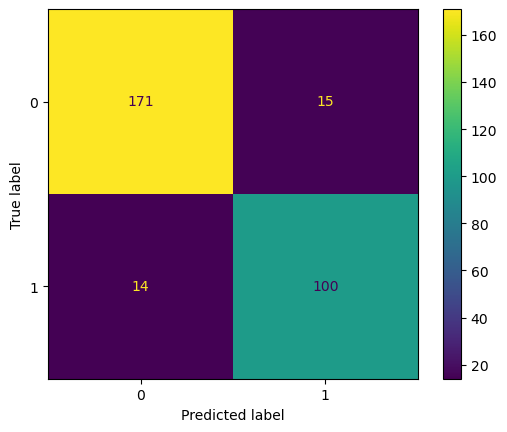

In [309]:
plot_confusion_matrix(rf_model, scaled_x_test, y_test)

**Note**

- the RandomForestClassifier model is the most viable model for this data

In [310]:
confusion_matrix(y_test, y_pred_rf)

array([[171,  15],
       [ 14, 100]], dtype=int64)

### To Deploy

In [311]:
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)
y_pred = final_model.predict(X)


In [312]:
from joblib import dump, load

dump(final_model, 'car_sales_pred.joblib')

['car_sales_pred.joblib']

In [313]:
model = load('car_sales_pred.joblib')


**Conclusion and Recommendations for Marketers:**

**Key Observations:**
- Female participants in our survey demonstrated a higher rate of car purchases compared to males.
- The older generation exhibited a higher propensity to purchase cars, suggesting shifting priorities even without significantly higher incomes.
- Younger demographics likely prioritize other life aspects such as travel, education, personal growth, exams, or family planning.

**Insights for Marketers:**

- Annual salary shows the strongest correlation with car purchase behavior.
- As age increases, annual salary tends to decrease.

**Recommendations:**

- **Targeting Strategies:** Develop targeted campaigns that resonate with the preferences and priorities of different demographic groups. For instance, focus on convenience and value propositions for older buyers, while emphasizing lifestyle benefits for younger demographics.
  
- **Financial Accessibility:** Consider flexible financing options or promotional offers that address potential financial constraints identified among non-purchasing clients.
  
- **Retention Strategies:** Implement loyalty programs and personalized marketing to retain existing clients and encourage repeat purchases.